**BDSN END TERM ASSIGNMENT** by
**[K V V S Krishna Prasad](https://www.linkedin.com/in/krishnaprasadk-ba6682214/)<br>**
**A21016**

# Linear Regression

We will examine a dataset with Ecommerce Customer Data for a company's website.
Then we will build a regression model that will predict the customer's yearly spend on the company's product.

<h4>Table of contents</h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">Linear Regression with Python</a></li>
        <li><a href="#ref2">Linear Regression with Pyspark</a></li>
    </ol>
</div>
<br>


<a id="ref1"></a>
## Linear Regression with Python

Importing all the required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
regr = linear_model.LinearRegression()

<h3 id="understanding_data">Understanding the Data</h3>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce_Customers.csv to Ecommerce_Customers.csv


In [4]:
df = pd.read_csv("Ecommerce_Customers.csv")
# take a look at the dataset
df.head(3)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


Lets select some features that we want to use for regression.

In [5]:
cdf = df[["Avg Session Length", "Time on App", 
               "Time on Website",'Length of Membership',"Yearly Amount Spent"]]
cdf.head(3)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


Lets plot Yearly Amount Spent values with respect to Length of Membership:

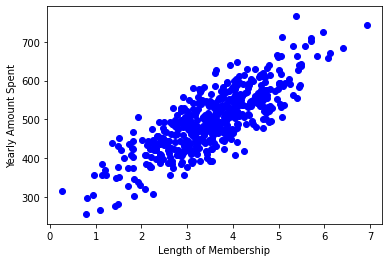

In [6]:
plt.scatter(cdf[["Length of Membership"]], cdf[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

In reality, there are __multiple variables__ that predict the Yearly Amount Spent. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting Yearly Amount Spent using Avg Session Length, Time on App, Time on Website and Length of Membership. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, we train with the training set and test with the testing set. 


In [7]:
msk = np.random.rand(len(df)) < 0.8

In [8]:
train = cdf[msk]
test = cdf[~msk]

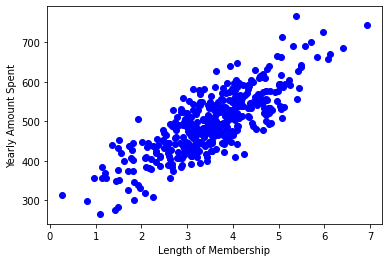

In [9]:
#### Train data distribution
plt.scatter(train[["Length of Membership"]], train[["Yearly Amount Spent"]],  color='blue')
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.show()

Creating the new variable inputCols

In [10]:
inputCols=["Avg Session Length", "Time on App", 
               "Time on Website",'Length of Membership']

In [11]:
x = np.asanyarray(train[inputCols])
y = np.asanyarray(train[['Yearly Amount Spent']])

In [12]:
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[25.63915127 38.72472598  0.34950061 61.57419194]]


__Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

<h2 id="prediction">Prediction</h2>

In [13]:
y_hat= regr.predict(test[inputCols])
x = np.asanyarray(test[inputCols])
y = np.asanyarray(test[['Yearly Amount Spent']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 116.94
Variance score: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<a id="ref2"></a>
### Linear Regression with Pyspark

First thing to do is start a Spark Session

In [36]:
!pip install pyspark

In [42]:
!apt update > /dev/null
!apt install openjdk-8-jdk-headless -qq > /dev/null

In [43]:
# Get latest and correct version of Spark
#
# if the current version of Spark is not used, there may be errors
# check here for current versions http://apache.osuosl.org/spark
#
#!wget -q http://apache.osuosl.org/spark/spark-2.2.2/spark-2.2.2-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
#!wget -q http://apache.osuosl.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!wget -q http://apache.osuosl.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

#!tar xf spark-2.4.5-bin-hadoop2.7.tgz
#!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
#!pip install -q findspark
!pip install -q pyspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"
#os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

Importing findspark

In [44]:
import findspark

In [45]:
findspark.init()

Let us import Sparksession from pyspark.sql

In [46]:
from pyspark.sql import SparkSession

Adding new variable named spark

In [47]:
spark = SparkSession.builder.appName('lr_example').getOrCreate()

Let us import Linear Regression from pyspark

In [48]:
from pyspark.ml.regression import LinearRegression

Using Spark to read in the Ecommerce Customers csv file.

In [49]:
# Use Spark to read in the Ecommerce Customers csv file.
data = spark.read.csv("Ecommerce_Customers.csv",inferSchema=True,header=True)

Printing the Schema of the DataFrame

In [50]:
# Print the Schema of the DataFrame
data.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



The data should to be in the form of two columns
("label","features")
Importing VectorAssembler and Vectors

In [51]:
# The data should to be in the form of two columns
# ("label","features")
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

Checking the columns

In [52]:
data.columns

['Email',
 'Address',
 'Avatar',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [53]:
assembler = VectorAssembler(
    inputCols=["Avg Session Length", "Time on App", 
               "Time on Website",'Length of Membership'],
    outputCol="features")

In [54]:
output = assembler.transform(data)

In [55]:
output.select("features").show(3)

+--------------------+
|            features|
+--------------------+
|[34.4972677251122...|
|[31.9262720263601...|
|[33.0009147556426...|
+--------------------+
only showing top 3 rows



In [56]:
output.show(1)

+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
|               Email|             Address|Avatar|Avg Session Length|      Time on App|  Time on Website|Length of Membership|Yearly Amount Spent|            features|
+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
|mstephenson@ferna...|835 Frank TunnelW...|Violet| 34.49726772511229|12.65565114916675|39.57766801952616|  4.0826206329529615|  587.9510539684005|[34.4972677251122...|
+--------------------+--------------------+------+------------------+-----------------+-----------------+--------------------+-------------------+--------------------+
only showing top 1 row



In [57]:
final_data = output.select("features",'Yearly Amount Spent')

In [58]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [59]:
final_data.show(3)

+--------------------+-------------------+
|            features|Yearly Amount Spent|
+--------------------+-------------------+
|[34.4972677251122...|  587.9510539684005|
|[31.9262720263601...|  392.2049334443264|
|[33.0009147556426...| 487.54750486747207|
+--------------------+-------------------+
only showing top 3 rows



Finally we have two columns , one with the names   "features" and the second "Yearly Amount Spent. 

-- The feature column has inside of it a vector of all the features that belong to that row.

-- The "label Yearly Amount Spent " column then needs to have the numerical label, either a regression numerical value, or a numerical value that matches to a classification grouping.

We  separated our data set into a training and test set. 

In [60]:
# Pass in the split between training/test as a list.
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [61]:
#train_data.show(1)

In [62]:
#test_data.show(1)

In [63]:
train_data,test_data = final_data.randomSplit([0.7,0.3])

In [64]:
# Create a Linear Regression Model object
lr = LinearRegression(labelCol='Yearly Amount Spent')

In [65]:
# Fit the model to the data and call this model lrModel
lrModel = lr.fit(train_data,)

Now we only train on the train_data

In [66]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {} Intercept: {}".format(lrModel.coefficients,lrModel.intercept))

Coefficients: [25.620824024177562,38.33483973440999,0.22619875457528998,61.46580744641741] Intercept: -1035.398529831008


Now we can directly get a .summary object using the evaluate method:

In [67]:
test_results = lrModel.evaluate(test_data)

In [68]:
test_results.residuals.show()
print("RMSE: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
| -5.844065562744902|
| 10.647004110185321|
|-17.390364726232406|
|-21.566643143536908|
| 2.7420846832964116|
|  19.11881450624452|
| 0.4092468124190418|
| -8.068351363017086|
|  4.421980132652436|
|-1.2380808283263605|
| -6.383790030645457|
| -9.227063183381858|
| -17.00789792561119|
|  8.008534629332075|
|-17.347573004240758|
|  4.560038050969524|
|  4.557708016398124|
| 6.0431626209696105|
| 5.5228090756415895|
|-11.907226381552903|
+-------------------+
only showing top 20 rows

RMSE: 10.150490099355077


Well that is nice, but realistically we will eventually want to test this model against unlabeled data, after all, that is the whole point of building the model in the first place. We can again do this with a convenient method call, in this case, transform(). Which was actually being called within the evaluate() method. Let's see it in action:

In [69]:
unlabeled_data = test_data.select('features')

<h2 id="prediction">Prediction</h2>

In [70]:
predictions = lrModel.transform(unlabeled_data)

In [71]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[30.4925366965402...| 288.3153112826594|
|[30.7377203726281...|451.13373808604456|
|[30.8162006488763...| 283.4767056747014|
|[31.1239743499119...| 508.5136969833027|
|[31.3091926408918...| 429.9786331566372|
|[31.3123495994443...| 444.4726035216961|
|[31.3895854806643...|409.66036424756385|
|[31.4474464941278...| 426.6710934582411|
|[31.5316044825729...| 432.0936255967101|
|[31.6610498227460...| 417.5964344082272|
|[31.8745516945853...|398.66903427691295|
|[31.8854062999117...|399.33033615585737|
|[31.9048571310136...| 490.9577553484273|
|[31.9549038566348...| 431.9893453105949|
|[31.9563005605233...| 564.4735047514396|
|[31.9764800614612...| 326.0344079831307|
|[32.0215955013870...| 517.0144667414293|
|[32.0305497162129...| 588.2313207976422|
|[32.0542618511847...| 556.3518485933414|
|[32.0637746203136...| 390.2381332883567|
+--------------------+------------

In [72]:
print("RMSE: {}".format(test_results.rootMeanSquaredError))
print("MSE: {}".format(test_results.meanSquaredError))

RMSE: 10.150490099355077
MSE: 103.03244925710544


# K means clustering

We will examine the same dataset of Ecommerce Customer Data and we will build a clustering model that will segregate the customer's yearly spend on the company's product.

<h4>Table of contents</h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#ref1">K means clustering using python</a></li>
        <li><a href="#ref2">K means clustering using pyspark</a></li>
    </ol>
</div>
<br>


##K means clustering using python

In [73]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

In [74]:
import pandas as pd
cust_df = pd.read_csv("Ecommerce_Customers.csv")
cust_df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [95]:
df = cust_df.drop(['Address','Avatar','Email'],axis = 1)
df.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [96]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.60728003,  2.49358859,  0.55010651,  1.11865385],
       [-0.94946372,  0.20655573, -0.87092735, -1.35178302],
       [-0.72713923,  0.04968115,  0.5720669 , -0.14850091],
       ...,
       [-0.55685385,  1.26018697,  1.42726105,  0.66013536],
       [ 0.34124841, -0.21829075, -1.19904197, -0.54072439],
       [ 0.36882066, -1.27732288, -0.79967926, -0.01937765]])

In [97]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
#print(labels)

We assign labels to each row in dataframe

In [98]:
df["Clus_km"] = labels
df.head(5)

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Clus_km
0,34.497268,12.655651,39.577668,4.082621,587.951054,0
1,31.926272,11.109461,37.268959,2.664034,392.204933,2
2,33.000915,11.330278,37.110597,4.104543,487.547505,1
3,34.305557,13.717514,36.721283,3.120179,581.852344,0
4,33.330673,12.795189,37.536653,4.446308,599.406092,0


We can easily check the centroid
values by averaging the features in each cluster.

In [99]:
df.groupby('Clus_km').mean()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Clus_km,,,,,
0,33.580691,12.702438,37.016568,4.523769,600.861572
1,33.017997,12.073048,37.075781,3.618583,504.612034
2,32.672806,11.477402,37.071436,2.567689,405.991803


Now, lets look at the distribution of customers based on their Avg Session Length and Yearly Amount Spent:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


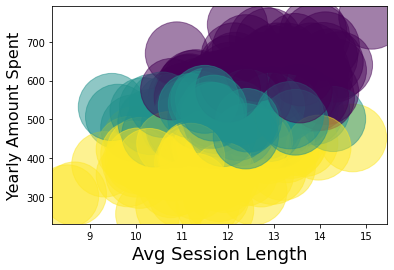

In [104]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Avg Session Length', fontsize=18)
plt.ylabel('Yearly Amount Spent', fontsize=16)

plt.show()


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other in terms of spending both their time and money.

## K means clustering using pyspark

First thing to do is start a Spark Session

In [105]:
import findspark
findspark.init()

In [106]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('customers').getOrCreate()

In [107]:
from pyspark.ml.clustering import KMeans
# Loads data.
dataset = spark.read.csv("Ecommerce_Customers.csv",header=True,inferSchema=True)

In [108]:
dataset.head(1)

[Row(Email='mstephenson@fernandez.com', Address='835 Frank TunnelWrightmouth, MI 82180-9605', Avatar='Violet', Avg Session Length=34.49726772511229, Time on App=12.65565114916675, Time on Website=39.57766801952616, Length of Membership=4.0826206329529615, Yearly Amount Spent=587.9510539684005)]

In [109]:
dataset.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



As we can see, __Address__, __Avatar__, __Email__ in this dataset are categorical variables. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop these features and run clustering.

In [110]:
columns_to_drop = ['Address','Avatar','Email']
dataset = dataset.drop(*columns_to_drop)
dataset.printSchema()

root
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [111]:
dataset.columns

['Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent']

In [112]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [118]:
from pyspark.ml.feature import StandardScaler

In [119]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

In [120]:
# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(final_data)

In [121]:
final_data

DataFrame[features: vector, Yearly Amount Spent: double]

In [122]:
# Normalize each feature to have unit standard deviation.
cluster_final_data = scalerModel.transform(final_data)

### Train the model and evaluate

Time to find out whether its 2 or 3!

In [123]:
# Trains a k-means model.
kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)

In [124]:
model3 = kmeans3.fit(cluster_final_data)
model2 = kmeans2.fit(cluster_final_data)

In [125]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [126]:
# Make predictions
predictions3 = model3.transform(cluster_final_data)
predictions2 = model2.transform(cluster_final_data)

In [127]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

In [128]:
silhouette = evaluator.evaluate(predictions3)
print("With k=3 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions2)
print("With k=2 Silhouette with squared euclidean distance = " + str(silhouette))

With k=3 Silhouette with squared euclidean distance = 0.24958506289058455
With k=2 Silhouette with squared euclidean distance = 0.2749602365731305


In [129]:
#Show the results

In [131]:
centers=model2.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

Cluster Centers:
[32.77175863 12.41689279 37.2192038   3.35009006]
[33.82993783 11.82832693 36.13230985  3.72194257]


In [132]:
centers=model3.clusterCenters()
print("Cluster Centers:")
for center in centers:
    print(center)

Cluster Centers:
[32.84400364 12.78623445 36.54503716  2.95049343]
[34.10354503 12.52540586 36.78993953  4.33935991]
[33.12254107 11.20710989 36.71120562  3.47626956]


In [133]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.

In [134]:
for k in range(2,9):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    predictions = model.transform(cluster_final_data)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    print("With K={}".format(k))
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print('--'*30)

With K=2
Silhouette with squared euclidean distance = 0.2749602365731305
------------------------------------------------------------
With K=3
Silhouette with squared euclidean distance = 0.24958506289058455
------------------------------------------------------------
With K=4
Silhouette with squared euclidean distance = 0.2668733279876138
------------------------------------------------------------
With K=5
Silhouette with squared euclidean distance = 0.2802078136232379
------------------------------------------------------------
With K=6
Silhouette with squared euclidean distance = 0.25830992674034225
------------------------------------------------------------
With K=7
Silhouette with squared euclidean distance = 0.2770262036101464
------------------------------------------------------------
With K=8
Silhouette with squared euclidean distance = 0.27907680974855814
------------------------------------------------------------


In [135]:
model3.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  140|
|         2|  187|
|         0|  173|
+----------+-----+



In [136]:
model2.transform(cluster_final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  250|
|         0|  250|
+----------+-----+



THE END